## Introduction
***

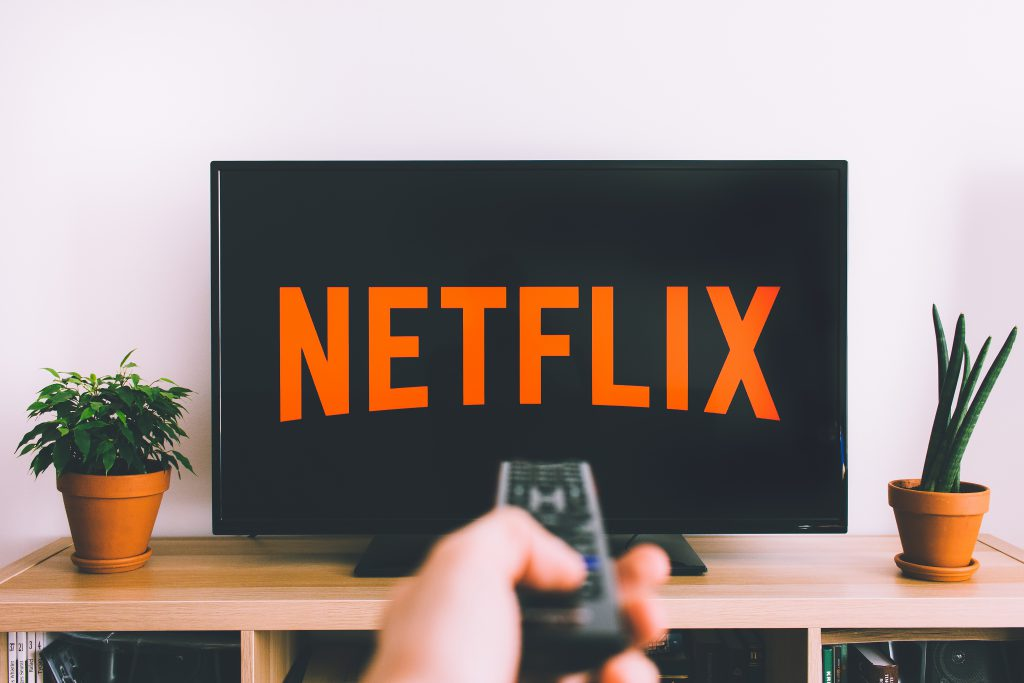

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Inspect the Data

The data you will use for creating your visualizations come from the following datasets:

 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 

Let's load the datasets and inspect them.

While inspecting the variables, ask yourself questions about the data such as:

- Is the data represented by days, weeks, or months? 
- In which ways are the files different? 
- What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [24]:
nflx_df = pd.read_csv('NFLX.csv')
print(nflx_df)

dji_df = pd.read_csv('DJI.csv')
print(dji_df)

nflx_quarter = pd.read_csv('NFLX_daily_by_quarter.csv')
print(nflx_quarter)

          Date        Open        High         Low       Close   Adj Close  \
0   2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1   2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2   2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3   2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4   2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   
5   2017-06-01  163.520004  166.869995  147.300003  149.410004  149.410004   
6   2017-07-01  149.800003  191.500000  144.250000  181.660004  181.660004   
7   2017-08-01  182.490005  184.619995  164.229996  174.710007  174.710007   
8   2017-09-01  175.550003  189.949997  172.440002  181.350006  181.350006   
9   2017-10-01  182.110001  204.380005  176.580002  196.429993  196.429993   
10  2017-11-01  197.240005  202.479996  184.320007  195.509995  195.509995   
11  2017-12-01  186.990005  194.490005  178.380005  191.960007  

## Rename Adj close

Notice how The first two column names are one word each, and the only one that is not is `Adj Close`!

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Change the name of the `Adj Close` column to `Price` all of the dataframes.

In [25]:
nflx_df = nflx_df.rename(columns={'Adj Close':'Price'})
dji_df = dji_df.rename(columns={'Adj Close':'Price'})
nflx_quarter = nflx_quarter.rename(columns={'Adj Close':'Price'}) 

## Visualize Quarterly Data

Now its time to visualize the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. Accomplish this using a violin plot with four violins, one for each business quarter!

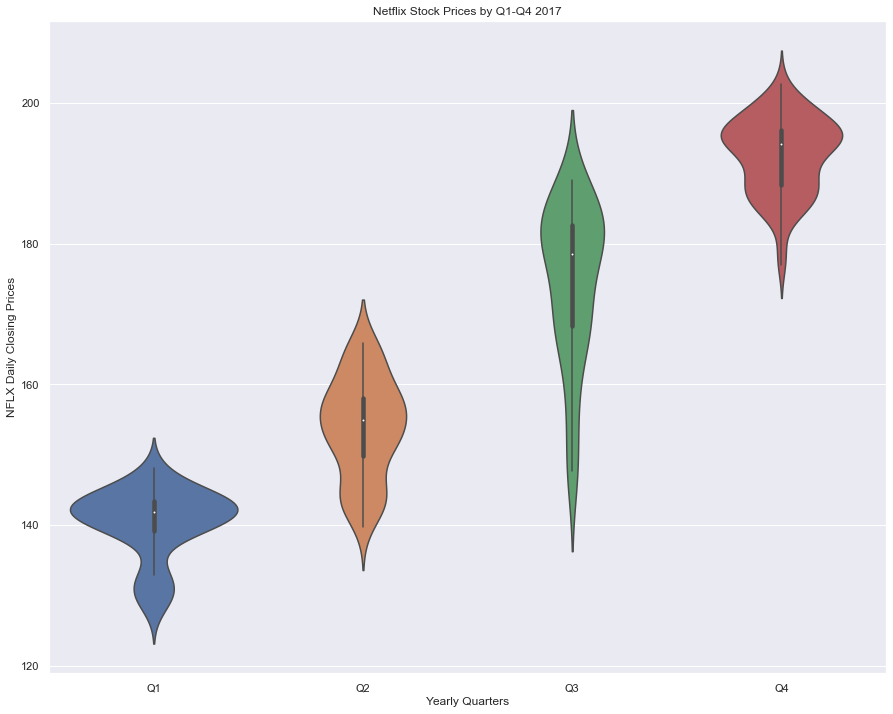

<Figure size 1080x1080 with 0 Axes>

In [36]:
#To instantiate violinplot
ax = sns.violinplot(x='Quarter', y='Price', data=nflx_quarter)
sns.set(rc={'figure.figsize':(15, 15)})

#To provide more info on visualisation
ax.set_title('Netflix Stock Prices by Q1-Q4 2017')
ax.set_xlabel('Yearly Quarters')
ax.set_ylabel('NFLX Daily Closing Prices')
plt.show()
plt.clf()

- What are your first impressions looking at the visualized data?

    - In 2017, we can clearly see that NFLX was on a great uptrend, as prices were increasing overall in all four quarters. we can also see that Q1 was the least volatile whereas Q3 was the most volatile for NFLX stock in 2017.


- In what range(s) did most of the prices fall throughout the year?

    - Q1 (USD 138 to USD 143)
    - Q2 (USD 150 to USD 158)
    - Q3 (USD 170 to USD 185)
    - Q4 (USD 190 to USD 195)


- What were the highest and lowest prices? 

    - The lowest prices were in Q1, at nearly USD 125 per share. The highest prices is in Q4, at nearly USD 210 per share.

## Measure Performance of Earnings per Share

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter plot. 

Use the following lists to create the scatter plot:

In [37]:
# Set distinct values to seperate quarters 
x_positions = [1, 2, 3, 4]

# Label each of the quarters
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]

# Actual earnings per share
earnings_actual =[.4, .15, .29, .41]

# Estimated projected earnings per share
earnings_estimate = [.37, .15, .32, .41]

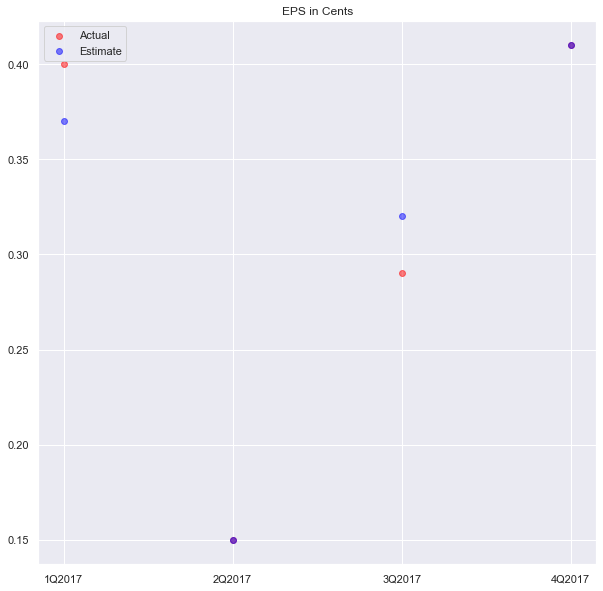

In [46]:
#Creating the subplots
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)

#To improve readability of the chart
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title('EPS in Cents')
plt.show()
plt.close()

## Visualize Earnings and Revenue Side by Side

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

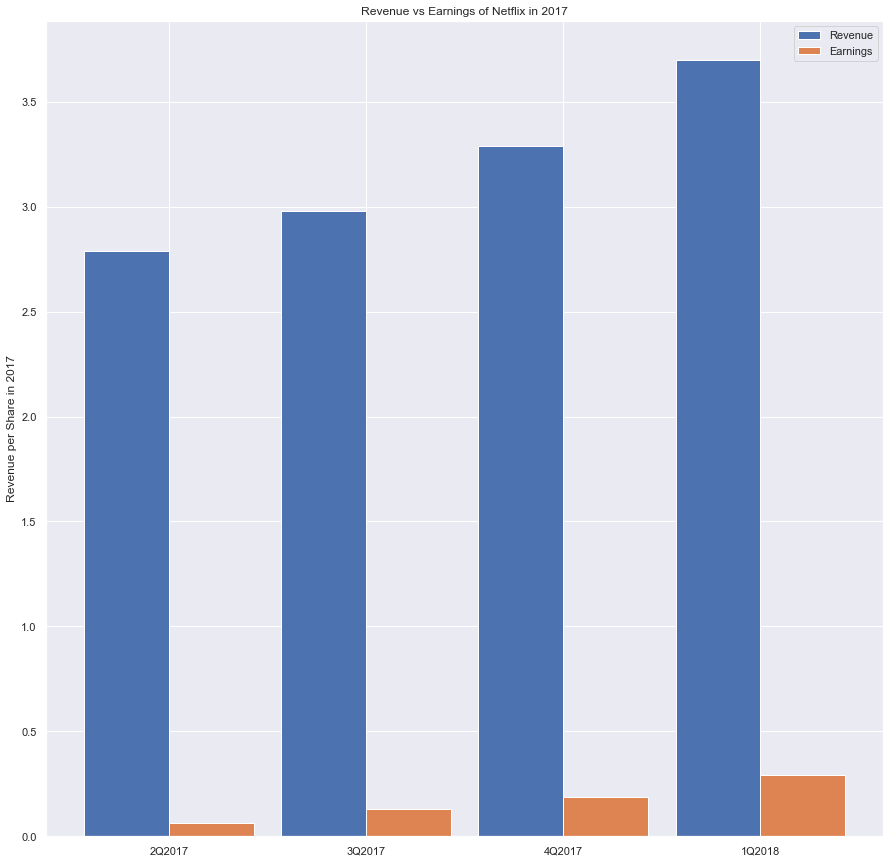

<Figure size 1080x1080 with 0 Axes>

In [60]:
# Reported values from Netflix
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
 
# Quarter labels list
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

nflx_index = np.arange(len(quarter_labels))
bar_width = 0.43

fig, ax = plt.subplots()
revenue_bar = ax.bar(nflx_index - bar_width/2, revenue_by_quarter, bar_width, label='Revenue')
earnings_bar = ax.bar(nflx_index + bar_width/2, earnings_by_quarter, bar_width, label='Earnings')
ax.set_xticks(nflx_index)
ax.set_xticklabels(quarter_labels)
ax.legend()
plt.ylabel('Revenue per Share in 2017')
plt.title('Revenue vs Earnings of Netflix in 2017')
plt.show()
plt.clf()


What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
    - Yes, revenue does generally show a great strong uptrend as we can see it accelerated slightly in Q3 and Q4.


- Do Earnings follow a trend?
    - Yes, earnings also follow a similar trend as it increases from quarter to quarter, however, it is not a similar pace as revenue growth.
    
    
- Roughly, what percentage of the revenue constitutes earnings?
    - Roughly only about 5 to 10% only.

## Comparing to the Dow Jones Industrial Average


In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

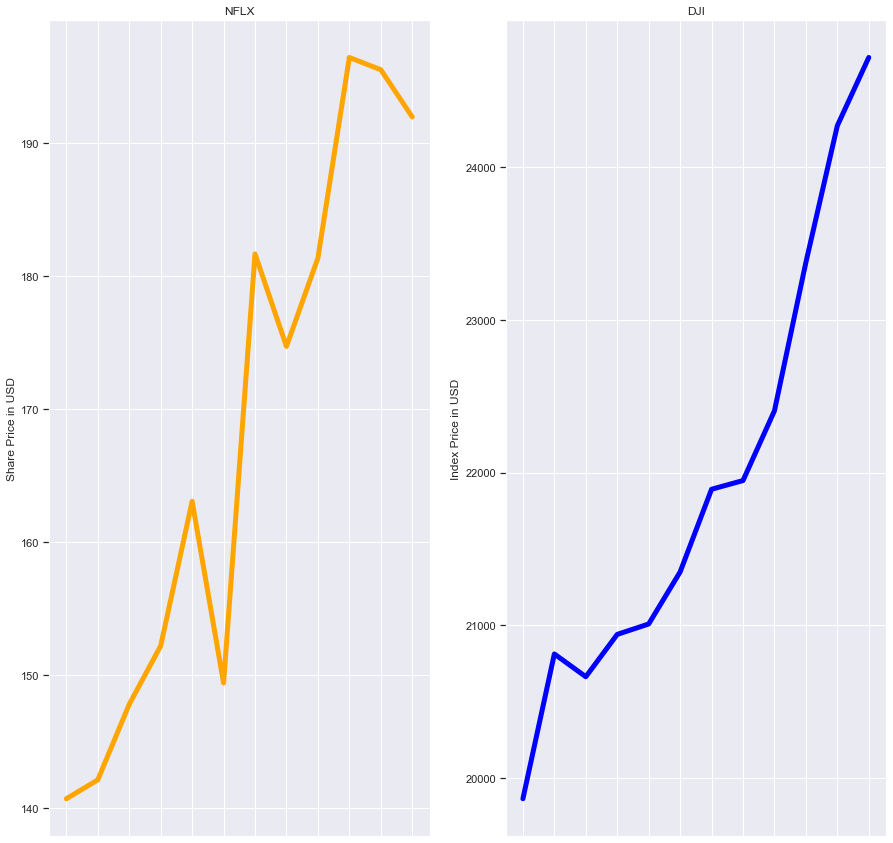

In [70]:
#To achieve this, we will need to plot two charts, one for NFLX (left) and one for DJI (right)

#Left Plot - NFLX
ax1 = plt.subplot(1,2,1)
plt.plot(nflx_df['Date'], nflx_df['Price'], color='orange', linewidth=5)
plt.title('NFLX')
plt.ylabel('Share Price in USD')
plt.tick_params(left=True,
               bottom=False,
               labelleft=True,
               labelbottom=False)

#Right Plot - DJI
ax2 = plt.subplot(1,2,2)
plt.plot(dji_df['Date'], dji_df['Price'], color='blue', linewidth=5)
plt.title('DJI')
plt.ylabel('Index Price in USD')
plt.tick_params(left=True,
               bottom=False,
               labelleft=True,
               labelbottom=False)

Consider the following questions when analyzing the plots:

- How did Netflix perform relative to Dow Jones Industrial Average in 2017? How do the prices of the stocks compare?
    - NFLX went from USD 141 to USD 193, a +36.8% performance. DJI went from USD 19900 to USD 24800, a +24.6% performance. NFLX has outperformed DJI by approximately 12.2%.
    
    
- Which was more volatile?
    - Although NFLX has outperformed DJI, we can see that NFLX has experienced more drawdown periods as compared to DJI. This would suggest NFLX was a more volatile asset.   
